# TSF TASK 4-Exploratory Data Analysis-Terrorism

# GRIP AUGUST 21

# Name:Amrin Fathima


# Importing libraries and reading data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path=r'C:\Users\Amrin\Desktop\terrorism.csv'
data=pd.read_csv(path,engine='python')

In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Data has loaded successfully.

# Data Exploration

In [4]:
data.shape

(181691, 135)

In [5]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [6]:
#There are missing values in two columns-approxdate and related
data.isnull()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
1,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
2,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181687,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181688,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True
181689,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True


here we can see all missing values

In [7]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday': 'Day','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','attacktype1_txt':'Attack_Type','targtype1_txt':'Target_Type','targsubtype1_txt':'Target_sub_type','weaptype1_txt':'Weapon','nkill':'Kill','gname':'Group','nwound':'Wound'},inplace=True)

In [8]:
df=data[['Year','Month','Day','Country','State','City','Region','Attack_Type','Target_Type','Target_sub_type','Kill', 'Wound','target1','summary','Group','Weapon']]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [10]:
data.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [11]:
data.duplicated().sum()

0

So there are no duplicate entries.

In [12]:
df.head()

,Year,Month,Day,Country,State,City,Region,Attack_Type,Target_Type,Target_sub_type,Kill,Wound,target1,summary,Group,Weapon
0,1970,7,2,Dominican Republic,NaN,Santo Domingo,Central America & Caribbean,Assassination,Private Citizens & Property,Named Civilian,1.0,0.0,Julio Guzman,NaN,MANO-D,Unknown
1,1970,0,0,Mexico,Federal,Mexico city,North America,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Tarlac,Unknown,Southeast Asia,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,1.0,0.0,Employee,NaN,Unknown,Unknown
3,1970,1,0,Greece,Attica,Athens,Western Europe,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,NaN,NaN,U.S. Embassy,NaN,Unknown,Explosives
4,1970,1,0,Japan,Fukouka,Fukouka,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,NaN,NaN,U.S. Consulate,NaN,Unknown,Incendiary


In [13]:
df.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
State                421
City                 434
Region                 0
Attack_Type            0
Target_Type            0
Target_sub_type    10373
Kill               10313
Wound              16311
target1              636
summary            66129
Group                  0
Weapon                 0
dtype: int64

In [14]:
df.fillna(0,inplace=True)

c:\users\amrin\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [15]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State              0
City               0
Region             0
Attack_Type        0
Target_Type        0
Target_sub_type    0
Kill               0
Wound              0
target1            0
summary            0
Group              0
Weapon             0
dtype: int64

#So missing values have been filled
# Analysing Data

In [16]:
#Analysing data
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'State', 'City', 'Region',
       'Attack_Type', 'Target_Type', 'Target_sub_type', 'Kill', 'Wound',
       'target1', 'summary', 'Group', 'Weapon'],
      dtype='object')

c:\users\amrin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Assassination'),
  Text(1, 0, 'Hostage Taking (Kidnapping)'),
  Text(2, 0, 'Bombing/Explosion'),
  Text(3, 0, 'Facility/Infrastructure Attack'),
  Text(4, 0, 'Armed Assault'),
  Text(5, 0, 'Hijacking'),
  Text(6, 0, 'Unknown'),
  Text(7, 0, 'Unarmed Assault'),
  Text(8, 0, 'Hostage Taking (Barricade Incident)')])

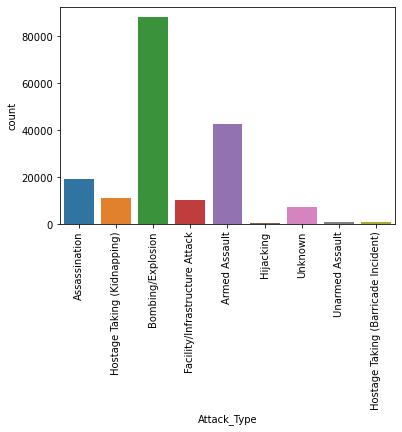

In [17]:
sns.countplot(df['Attack_Type'])
plt.xticks(rotation=90)

Bombing/Explosion is the most common attack type.

c:\users\amrin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


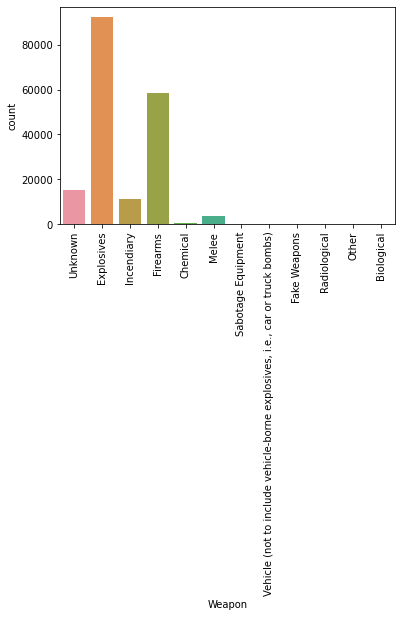

In [18]:
sns.countplot(df['Weapon'])
plt.xticks(rotation=90)
plt.show()

The most commonly used weapons are Explosives and Firearms.

<AxesSubplot:>

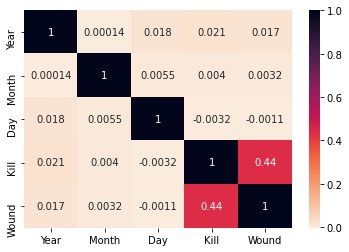

In [19]:
sns.heatmap(df.corr(),cmap='rocket_r',annot=True)

We can see from the above heatmap that there is not much of a correlation between the variables except for the number of people killed and wounded.

# Analysing the number of terror attacks per year

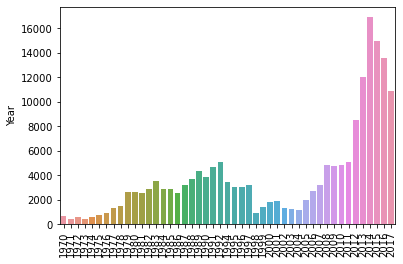

In [20]:
#Analysing the number of terror attacks per year
year=df['Year'].unique()
number_of_attacks=df['Year'].value_counts().sort_index()
sns.barplot(x=year,y=number_of_attacks)
plt.xticks(rotation=90)
plt.show()

Most terror attacks have happened in the period 2013-2017.

# Analysing the given dataset Countrywise

In [21]:
#Analysing the given dataset Countrywise
df['Country'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
Antigua and Barbuda        1
St. Lucia                  1
International              1
Vatican City               1
New Hebrides               1
Name: Country, Length: 205, dtype: int64

In [22]:
country=df['Country'].value_counts()

In [23]:
country.shape

(205,)

In [24]:
country.sort_values()

New Hebrides             1
Falkland Islands         1
Wallis and Futuna        1
North Korea              1
Andorra                  1
                     ...  
Colombia              8306
India                11960
Afghanistan          12731
Pakistan             14368
Iraq                 24636
Name: Country, Length: 205, dtype: int64

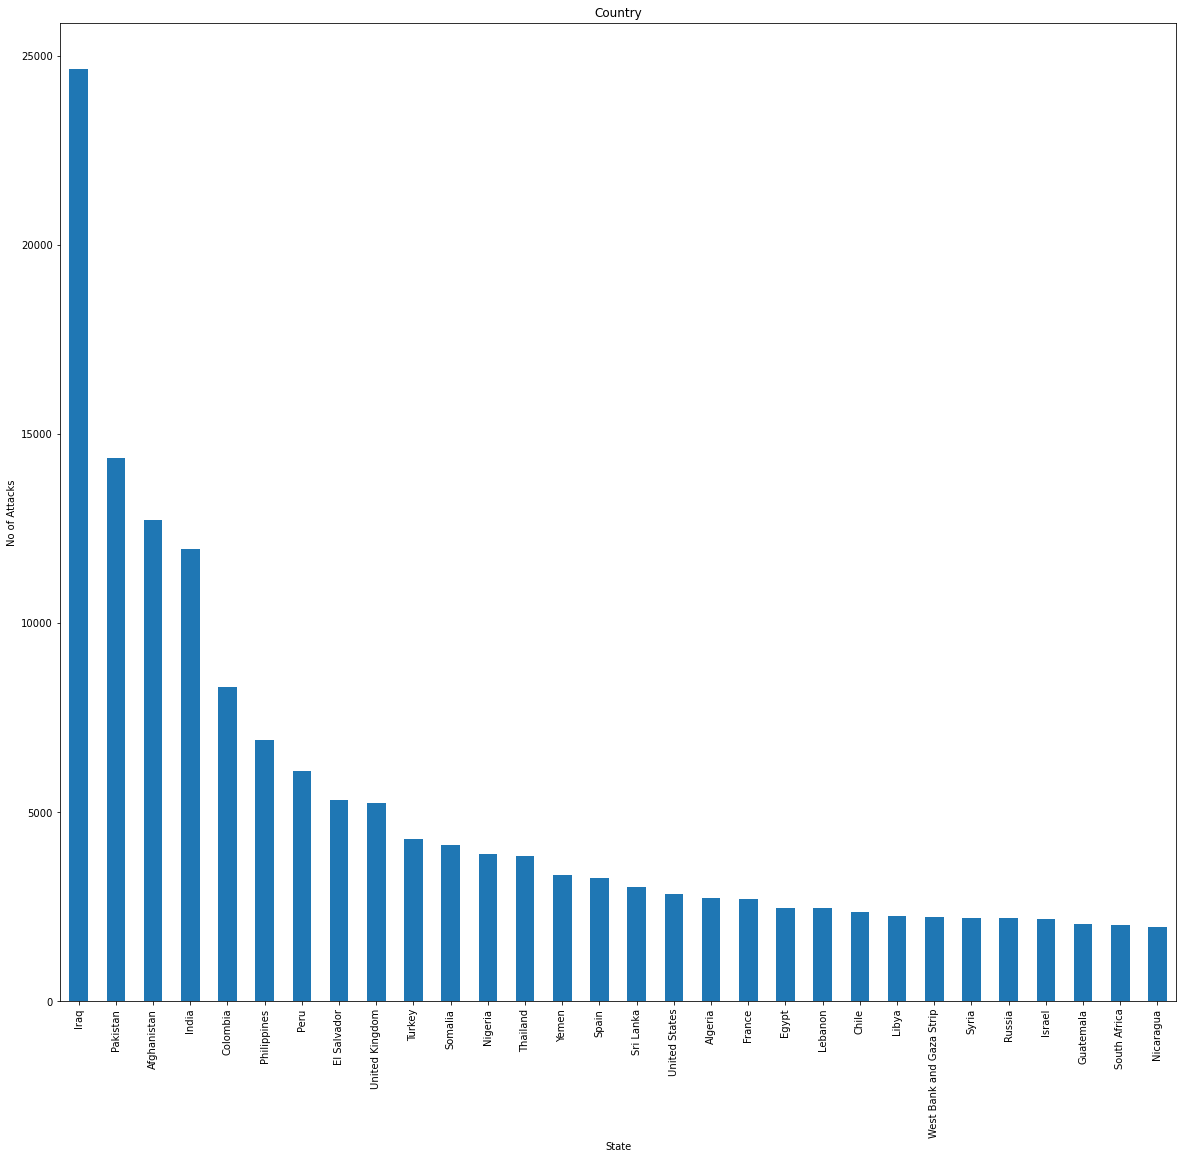

In [25]:
country.head(30).plot(kind='bar',figsize=(20,18))
plt.title("Country")
plt.ylabel('No of Attacks')
plt.xlabel('State')
plt.show()

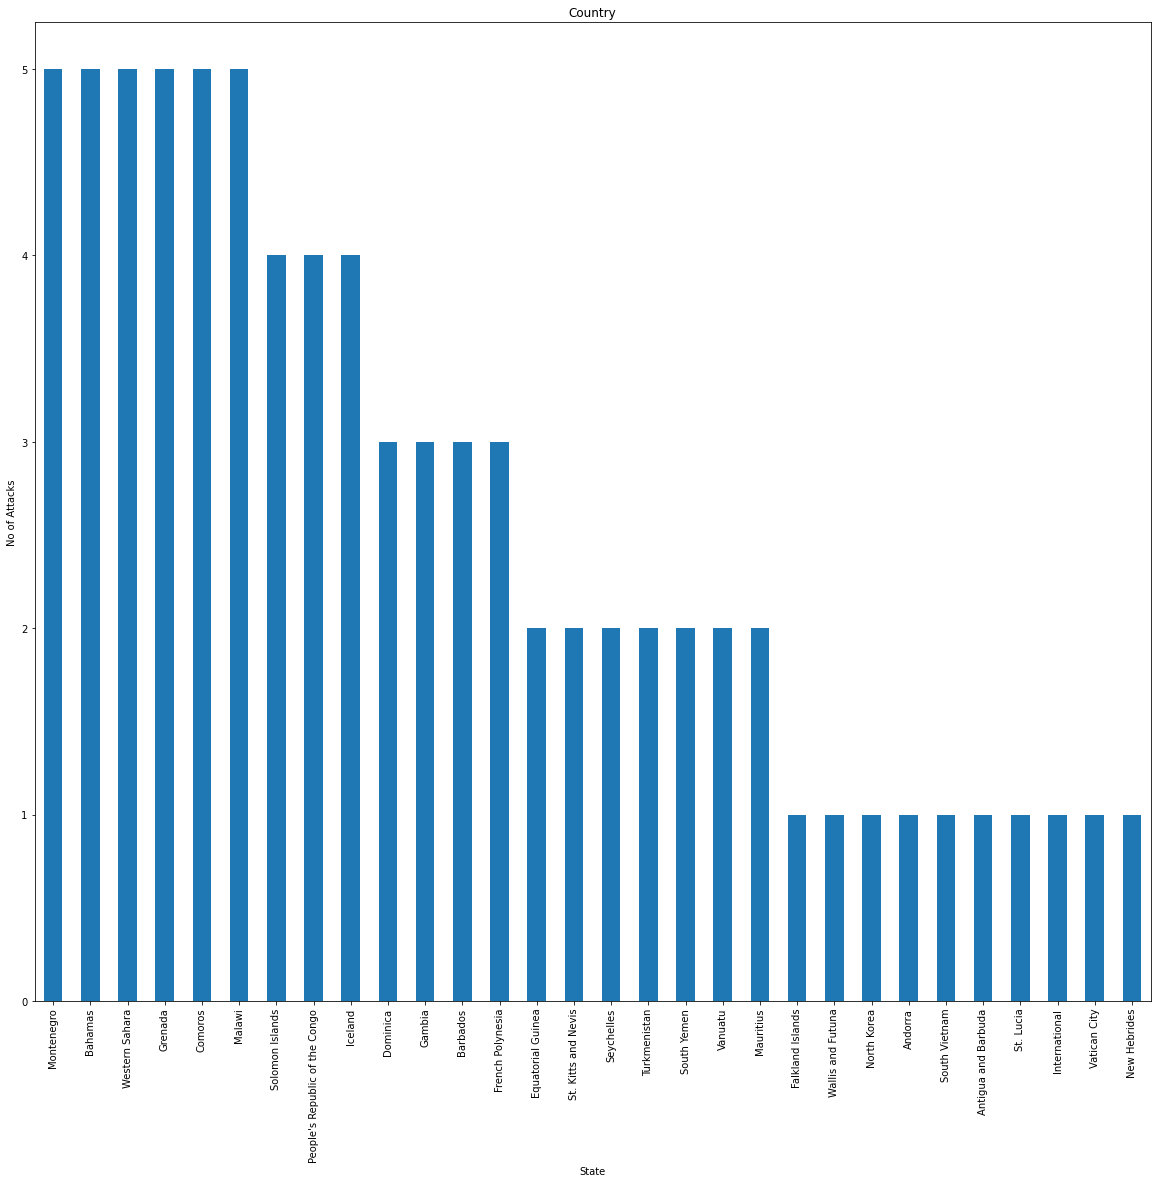

In [26]:
country.tail(30).plot(kind='bar',figsize=(20,18))
plt.title("Country")
plt.ylabel('No of Attacks')
plt.xlabel('State')
plt.show()

Iraq has the highest no of attacks.

# Analysing Regionwise

(array([], dtype=float64), [])

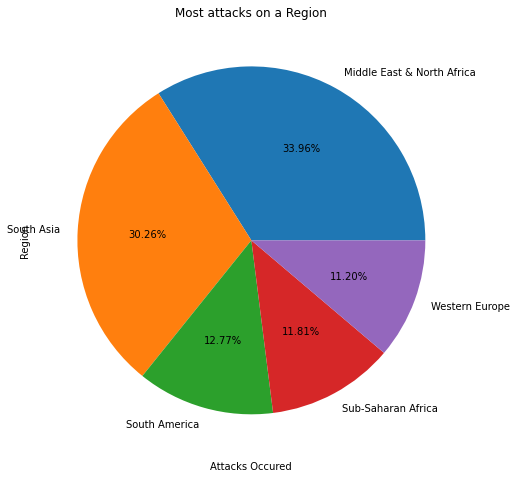

In [27]:
#Analysing Regionwise
df['Region'].value_counts().head().plot(kind = 'pie', figsize = (15,8), fontsize=10,autopct='%1.2f%%',textprops = {"fontsize":15})
plt.xlabel("Attacks Occured", size = 10)
plt.title("Most attacks on a Region")
plt.xticks(size = 10)
plt.yticks(size = 10)

Middle East,North Africa and South Asia are hot zones.

c:\users\amrin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


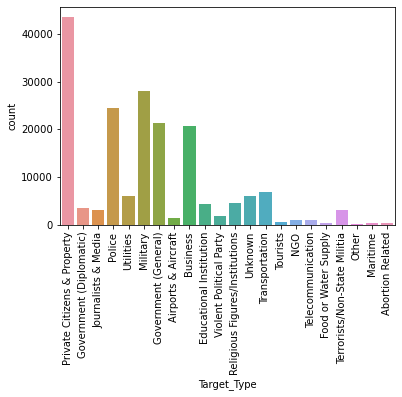

In [28]:
sns.countplot(df['Target_Type'])
plt.xticks(rotation=90)
plt.show()

Private citizens & property and military have been targetted by terror groups more frequently.

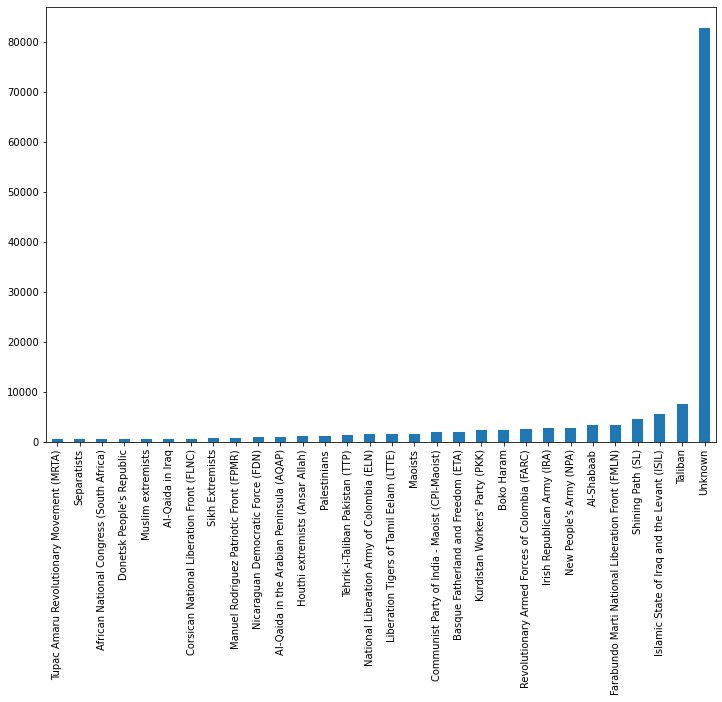

In [29]:
group=df['Group'].value_counts().sort_values()
group.tail(30).plot(kind='bar',figsize=(12,8))
plt.xticks(rotation=90)
plt.show()

Most Terror attacks are performed by unknown groups and the Taliban.

In [30]:
y= df.groupby(['Group'])[['Kill', 'Wound']].mean()
y.head()

,Kill,Wound
Group,,
1 May,0.2,0.0
14 K Triad,0.0,0.0
14 March Coalition,5.0,80.0
14th of December Command,0.0,0.0
15th of September Liberation Legion,0.0,1.0


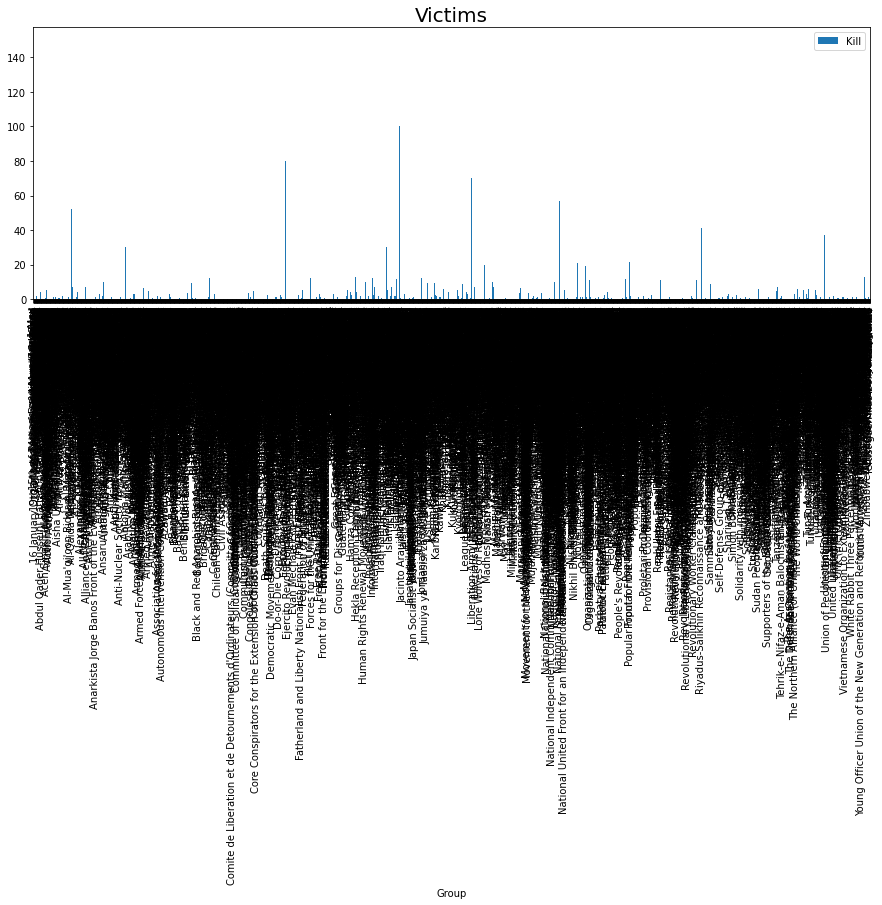

In [31]:
y[['Kill']].plot(kind = 'bar', figsize = (15,5))
plt.title('Victims', fontsize = 20)
plt.show()

CONCLUSION:

    *Hot zones:
    
        Region:North Africa,Middle East& South Asia
        
        Countries:Iraq and the Indian Subcontinent(Pakistan,Afghanistan,India)
        
    *The number of terror attacks have been significantly high for the past 5 years(2013-17)  which indicates that terror attacks are high and may be more frequent.
    
    *Most terror attacks use Explosives and firearms.
    
    *Military and private citizens are usually targetted so it's important to take necessary prventive measures if possible to protect them.
    
    *Most terror attacks are performed by unknown grps.
    